Reading data from https://www.nature.com/articles/s41597-020-0386-x#Sec9

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 10)

# Reading without a Reader class

## Read data

In [2]:
import pandas as pd

In [3]:
ref = "MUSE_20180111_155115_19000"
data = pd.read_csv(f"../data/nature/ECGData/{ref}.csv")
data

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-214.72,-229.36,-14.64,224.48,-102.48,-122.00,614.88,814.96,912.56,126.88,-239.12,-507.52
1,-200.08,-209.84,-9.76,204.96,-97.60,-112.24,605.12,819.84,927.20,165.92,-195.20,-463.60
2,-190.32,-195.20,-4.88,195.20,-92.72,-102.48,600.24,829.60,956.48,204.96,-151.28,-429.44
3,-165.92,-165.92,0.00,165.92,-82.96,-82.96,590.48,844.24,971.12,239.12,-117.12,-400.16
4,-161.04,-156.16,4.88,161.04,-82.96,-78.08,585.60,844.24,985.76,273.28,-78.08,-370.88
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-117.12,9.76,126.88,53.68,-122.00,68.32,439.20,634.40,800.32,278.16,0.00,-273.28
4996,-102.48,14.64,117.12,43.92,-112.24,63.44,424.56,634.40,819.84,297.68,24.40,-248.88
4997,-92.72,29.28,122.00,34.16,-107.36,73.20,424.56,644.16,829.60,312.32,43.92,-229.36
4998,-92.72,34.16,126.88,29.28,-112.24,78.08,424.56,644.16,829.60,312.32,58.56,-204.96


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

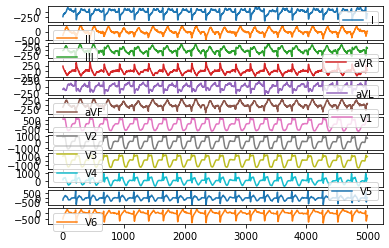

In [4]:
data.plot(subplots=True)

In [5]:
data.shape

(5000, 12)

In [6]:
data.values

array([[-214.72, -229.36,  -14.64, ...,  126.88, -239.12, -507.52],
       [-200.08, -209.84,   -9.76, ...,  165.92, -195.2 , -463.6 ],
       [-190.32, -195.2 ,   -4.88, ...,  204.96, -151.28, -429.44],
       ...,
       [ -92.72,   29.28,  122.  , ...,  312.32,   43.92, -229.36],
       [ -92.72,   34.16,  126.88, ...,  312.32,   58.56, -204.96],
       [ -87.84,   29.28,  117.12, ...,  312.32,   63.44, -200.08]])

## Reading References

In [7]:
references = pd.read_excel("../data/nature/Diagnostics.xlsx")
references
references.set_index("FileName", inplace=True)

In [8]:
references.T.to_dict()

{'MUSE_20180113_171327_27000': {'Rhythm': 'AFIB',
  'Beat': 'RBBB TWC',
  'PatientAge': 85,
  'Gender': 'MALE',
  'VentricularRate': 117,
  'AtrialRate': 234,
  'QRSDuration': 114,
  'QTInterval': 356,
  'QTCorrected': 496,
  'RAxis': 81,
  'TAxis': -27,
  'QRSCount': 19,
  'QOnset': 208,
  'QOffset': 265,
  'TOffset': 386},
 'MUSE_20180112_073319_29000': {'Rhythm': 'SB',
  'Beat': 'TWC',
  'PatientAge': 59,
  'Gender': 'FEMALE',
  'VentricularRate': 52,
  'AtrialRate': 52,
  'QRSDuration': 92,
  'QTInterval': 432,
  'QTCorrected': 401,
  'RAxis': 76,
  'TAxis': 42,
  'QRSCount': 8,
  'QOnset': 215,
  'QOffset': 261,
  'TOffset': 431},
 'MUSE_20180111_165520_97000': {'Rhythm': 'SA',
  'Beat': 'NONE',
  'PatientAge': 20,
  'Gender': 'FEMALE',
  'VentricularRate': 67,
  'AtrialRate': 67,
  'QRSDuration': 82,
  'QTInterval': 382,
  'QTCorrected': 403,
  'RAxis': 88,
  'TAxis': 20,
  'QRSCount': 11,
  'QOnset': 224,
  'QOffset': 265,
  'TOffset': 415},
 'MUSE_20180113_121940_44000': {'Rhyt

# Read data with NatureReader class

In [9]:
from data_handling.nature_reader import NatureReader

In [10]:
%%time

reader = NatureReader(path="../data/nature", use="noisy")
# This can take a while
ds = reader.get_dataset()

CPU times: user 1min 30s, sys: 29.5 s, total: 1min 59s
Wall time: 2min 10s


In [11]:
ds

[DataPoint(x=array([[-253.76,  263.52,  517.28, ...,  810.08,  810.08,  527.04],
        [-253.76,  263.52,  517.28, ...,  810.08,  810.08,  527.04],
        [-253.76,  263.52,  517.28, ...,  810.08,  810.08,  527.04],
        ...,
        [ -34.16,  -68.32,  -34.16, ..., -204.96, -200.08,  102.48],
        [  24.4 ,  -48.8 ,  -73.2 , ..., -200.08, -195.2 ,   92.72],
        [   4.88,  -34.16,  -39.04, ..., -170.8 , -165.92,  112.24]]), y='AFIB'),
 DataPoint(x=array([[ -9.76,   9.76,  19.52, ...,  53.68,  48.8 ,   0.  ],
        [-24.4 , -19.52,   4.88, ...,  34.16,  34.16, -14.64],
        [-19.52, -19.52,   0.  , ...,  34.16,  34.16,  -9.76],
        ...,
        [ 14.64,   9.76,  -4.88, ..., -14.64, -19.52,   4.88],
        [  9.76,   9.76,   0.  , ..., -19.52, -24.4 ,   0.  ],
        [  9.76,   9.76,   0.  , ..., -24.4 , -29.28,  -4.88]]), y='SB'),
 DataPoint(x=array([[ -29.28,  -63.44,  -34.16, ...,  317.2 ,   63.44,  -14.64],
        [ -19.52,  -53.68,  -34.16, ...,  326.96,   5

In [12]:
import matplotlib.pyplot as plt

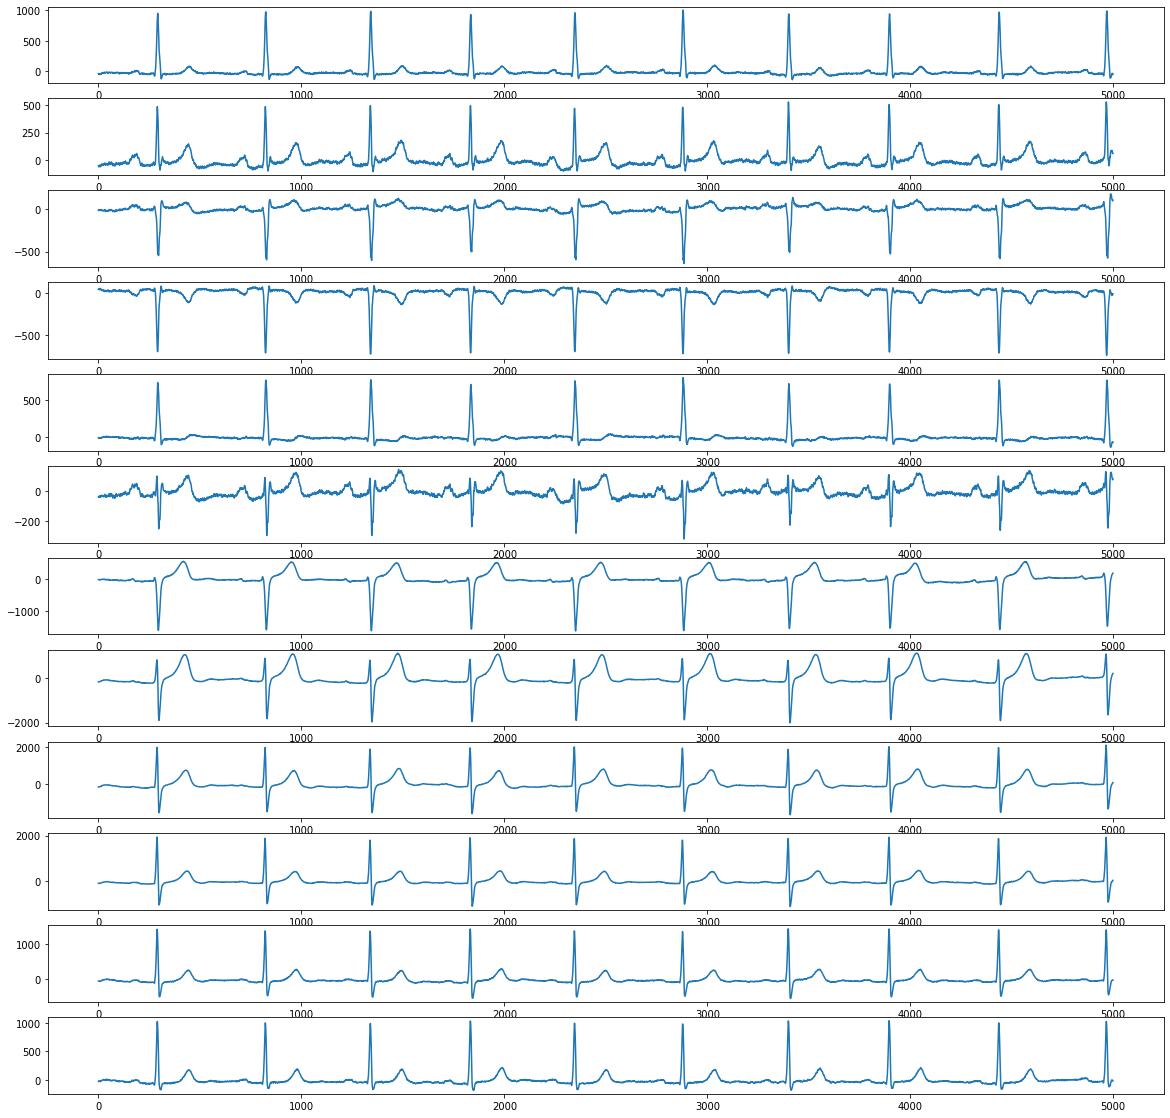

In [14]:
idx = 12
x = ds[idx].x
y = ds[idx].y
fig, ax = plt.subplots(12, 1, figsize=(20,20))
for i in range(12):
    ax[i].plot(x[:,i])

plt.show()